In [1]:
import re
import pandas as pd

In [2]:
# Program to read the entire file (absolute path) using read() function
caseNo='Case42'
file_path = 'Research Data/'+caseNo+'.txt'

#file = open("/Users/lahiruwijayapala/Desktop/Research Data/Case1.txt", "r")
file = open(file_path, "r")
content = file.read()
file.close()

In [3]:
### Parse to a list of Dicts
def parse_prompt_response(file_path):
    with open(file_path, 'r') as file:
        content = file.read()

    pairs = content.split('---END_OF_PAIR---')
    data = []
    
    for pair in pairs:
        if '---PROMPT_START---' in pair and '---RESPONSE_START---' in pair:
            prompt, response = pair.split('---RESPONSE_START---', 1)
            prompt = prompt.split('---PROMPT_START---', 1)[-1].strip()
            response = response.strip()
            data.append({'prompt': prompt, 'response': response})
    
    return data

pairs = parse_prompt_response(file_path)



In [ ]:
df=pd.DataFrame(pairs)
df.head()

,prompt,response
0,plan a trip to rotorua from auckland,Here's a plan for your trip from Auckland to R...
1,we are four people .all are adults,"For four adults, here are a few tweaks to ensu..."
2,plan to stay four days this november last week...,Here’s a four-day trip plan for Rotorua with a...
3,we are going by my own car,"Since you're traveling by your own car, you ca..."
4,first day break fast and lunch prepare by our ...,Here's an updated plan for Day 1 with your sel...


In [5]:
# Join prompts with a period at the end if they don't already end with '.' or '?'
all_prompts = "\n".join(f'"{prompt if prompt.endswith((".", "?")) else prompt + "."}"' for prompt in df['prompt'])

print(all_prompts)

"plan a trip to rotorua from auckland."
"we are four people .all are adults."
"plan to stay four days this november last week and my budget is 2000$."
"we are going by my own car."
"first day break fast and lunch prepare by our selves and dinner plan to make bread sandwiches."
"plan to visit waitamo caves on the way to rotorua."
"sorry mistake its a three day trip."
"give me a final plan for three days trip remove waitamo cave and add some fun activities."


# Readability scores

In [6]:
import pandas as pd
import textstat


def calculate_flesch_reading_ease(response):
    return textstat.flesch_reading_ease(response)

def create_dataframe(file_path):
    pairs = parse_prompt_response(file_path)
    
    scores = []
    for pair in pairs:
        score = calculate_flesch_reading_ease(pair['response'])
        scores.append({'prompt': pair['prompt'], 'response': pair['response'], 'flesch_reading_ease': score})
    
    df = pd.DataFrame(scores)
    return df

# Example usage
df = create_dataframe(file_path)
print(df)

                                              prompt  \
0               plan a trip to rotorua from auckland   
1                 we are four people .all are adults   
2  plan to stay four days this november last week...   
3                         we are going by my own car   
4  first day break fast and lunch prepare by our ...   
5  plan to visit waitamo caves on the way to rotorua   
6                 sorry mistake its a three day trip   
7  give me a final plan for three days trip remov...   

                                            response  flesch_reading_ease  
0  Here's a plan for your trip from Auckland to R...                60.04  
1  For four adults, here are a few tweaks to ensu...                54.32  
2  Here’s a four-day trip plan for Rotorua with a...                67.25  
3  Since you're traveling by your own car, you ca...                63.80  
4  Here's an updated plan for Day 1 with your sel...                65.73  
5  Here’s an updated itinerary for your

# Response Readability

In [7]:
case_numbers=[1,3,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,31,32,34,36,38,40,41,42]

scores = []

for i in case_numbers:
    file_path = 'Research Data/Case'+str(i)+'.txt'
    
    pairs = parse_prompt_response(file_path)
    df=pd.DataFrame(pairs)
    all_prompts = all_prompts = "\n".join(f'"{prompt if prompt.endswith((".", "?")) else prompt + "."}"' for prompt in df['prompt'])
    all_responses = "\n".join(f'"{response}"' for response in df['response'])
    
    scores.append({'CaseNo':i,'Prompt_readability':textstat.flesch_reading_ease(all_prompts),'Response_readability':textstat.flesch_reading_ease(all_responses)})
    
    
df = pd.DataFrame(scores)
df.head()

,CaseNo,Prompt_readability,Response_readability
0,1,67.76,54.12
1,3,76.11,44.44
2,6,87.11,59.19
3,7,83.25,62.88
4,8,96.89,66.84


In [8]:
# Insert Participant and ParticipantNo column
#df['Participant'] = ['P' + str(i) for i in range(1, len(df) + 1)]
df['ParticipantNo'] = [i for i in range(1, len(df) + 1)]
df.head()

,CaseNo,Prompt_readability,Response_readability,ParticipantNo
0,1,67.76,54.12,1
1,3,76.11,44.44,2
2,6,87.11,59.19,3
3,7,83.25,62.88,4
4,8,96.89,66.84,5


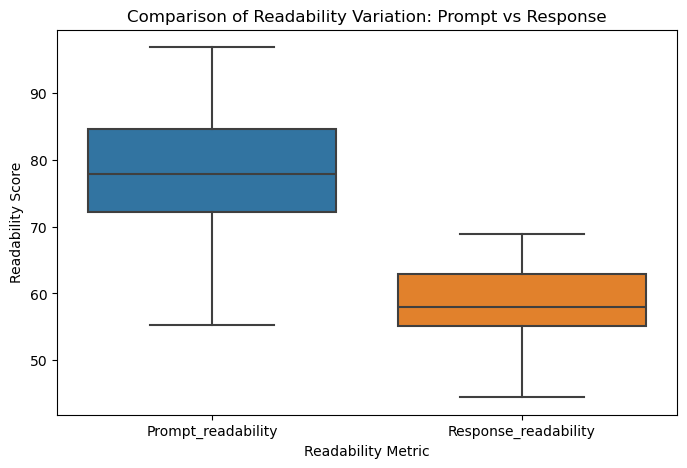

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(8, 5))

# Create a boxplot to compare readability variation
sns.boxplot(data=df[['Prompt_readability', 'Response_readability']])

# Set plot labels and title
plt.xlabel('Readability Metric')
plt.ylabel('Readability Score')
plt.title('Comparison of Readability Variation: Prompt vs Response')

# Show the plot
plt.show()


/Users/lahiruwijayapala/opt/anaconda3/envs/test2/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lahiruwijayapala/opt/anaconda3/envs/test2/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lahiruwijayapala/opt/anaconda3/envs/test2/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lahiruwijayapala/opt/anaconda3/envs/test2/lib/python3.11/site-packages/seaborn/_oldcore.py

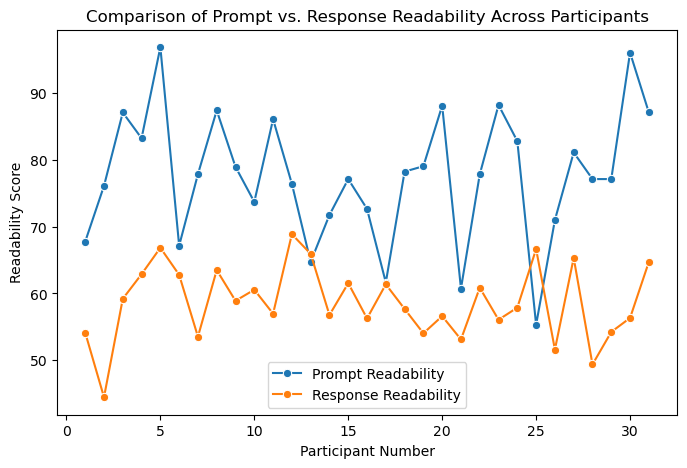

In [10]:

# Set up the figure
plt.figure(figsize=(8, 5))

# Plot lineplot for readability scores across participants
sns.lineplot(x='ParticipantNo', y='Prompt_readability', data=df, marker='o', label='Prompt Readability')
sns.lineplot(x='ParticipantNo', y='Response_readability', data=df, marker='o', label='Response Readability')

# Set plot labels and title
plt.xlabel('Participant Number')
plt.ylabel('Readability Score')
plt.title('Comparison of Prompt vs. Response Readability Across Participants')
plt.legend()

# Show the plot
plt.show()
